In [8]:
import seaborn as sns
import pandas as pd 
import numpy as np
from math import *
from scipy import stats
import random
from matplotlib import pyplot as plt

In [15]:
# import the dataset 
try:
    #For Kaggle run
    AAPL_data=pd.read_csv('/kaggle/input/apple-aapl-stocks-financial-performance/AAPL.csv',index_col=None)
    AAPL_data_sliced=AAPL_data[AAPL_data.columns[2:]]
#AAPL_data_sliced
except:
    #For offline run
    AAPL_data=pd.read_csv('AAPL.csv',index_col=None) # Read the data
    AAPL_data_sliced=AAPL_data[AAPL_data.columns[2:]] 
"""# Slice the first two columns
Symbol and Date" to avoid errors when computing descriptive statistics 
especially for visualizations"""
AAPL_data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-05-01 00:00:00+00:00,146.58,147.200,144.96,145.10,32818760,34.593441,34.739763,34.211115,34.244155,131275040,0.0,1.0
1,AAPL,2017-05-02 00:00:00+00:00,147.51,148.090,146.84,147.54,39752670,34.812924,34.949807,34.654802,34.820004,159010680,0.0,1.0
2,AAPL,2017-05-03 00:00:00+00:00,147.06,147.490,144.27,145.59,45142806,34.706723,34.808204,34.048272,34.359797,180571224,0.0,1.0
3,AAPL,2017-05-04 00:00:00+00:00,146.53,147.140,145.81,146.52,23275690,34.581641,34.725603,34.411718,34.579281,93102760,0.0,1.0
4,AAPL,2017-05-05 00:00:00+00:00,148.96,148.980,146.76,146.76,26787359,35.155130,35.159850,34.635922,34.635922,107149436,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,AAPL,2022-04-25 00:00:00+00:00,162.88,163.170,158.46,161.12,96046376,162.880000,163.170000,158.460000,161.120000,96046376,0.0,1.0
1256,AAPL,2022-04-26 00:00:00+00:00,156.80,162.340,156.72,162.25,94008394,156.800000,162.340000,156.720000,162.250000,94008394,0.0,1.0
1257,AAPL,2022-04-27 00:00:00+00:00,156.57,159.790,155.38,155.91,88063191,156.570000,159.790000,155.380000,155.910000,88063191,0.0,1.0
1258,AAPL,2022-04-28 00:00:00+00:00,163.64,164.515,158.93,159.25,130216792,163.640000,164.515000,158.930000,159.250000,130216792,0.0,1.0


<h1> Statistical Experiments & Significance Testing </h1>
<h2> A/B Testing </h2>



<h2> Hypothesis Testing </h2>


Hypothesis tests by their nature involve not just a null hypothesis but also an offset‐
ting alternative hypothesis.

Rule of Thumb: the null and alternative hypotheses must account for all possibilities


<h3>The Null Hypothesis</h3>


Its the baseline assumption that the treatments are equivalent, and any difference between the groups
 is due to chance

A null hypothesis is a logical construct embodying the notion that nothing special has happened, and any effect you observe is due to random chance


<h3>Alternative Hypothesis</h3>
<h3>One-Way Versus Two-Way Hypothesis Tests</h3>


<h2>Resampling</h2>


Resampling in statistics means to repeatedly sample values from observed data, with a
general goal of assessing random variability in a statistic

Used to assess and improve the accuracy of some machine-learning models (e.g., the predictions
from decision tree models

<h3>Permutation Test</h3>


Also randomization test


Its a testing process that involves combining two or more samples while randomly reallocating the observations to the resamples.


 Permute means to change the order of a set of values

It is the logical embodiment of the null hypothesis that the treatments to which the groups were exposed do not differ

The permutation procedure is as
follows:
1. Combine the results from the different groups into a single data set.
2. Shuffle the combined data and then randomly draw (without replacement) a
resample of the same size as group A (clearly it will contain some data from the
other groups).
3. From the remaining data, randomly draw (without replacement) a resample of
the same size as group B.
4. Do the same for groups C, D, and so on. You have now collected one set of
resamples that mirror the sizes of the original samples.
5. Whatever statistic or estimate was calculated for the original samples (e.g., differ‐
ence in group proportions), calculate it now for the resamples, and record; this
constitutes one permutation iteration.
6. Repeat the previous steps R times to yield a permutation distribution of the test
statistic.

Scenario 1:
If the observed difference lies well within the set of permuted differences, then we have not proven anything—the observed difference is within the
range of what chance might produce

Scenario 2: If the observed difference lies outside
most of the permutation distribution, then we conclude that chance is not responsible. In technical terms, the difference is statistically significant

# Permutation Example

### Permutation Application Example


## Note : T/R

A company selling a relatively high-value service wants to test which of two web presentations (A and B) does a better selling job.

It does this by comparing the session time spent by users for each web page i.e., for both A and B.

The approach is to define a function that works without replacement. Where  nB indices are assigned to the B group while the remaining nA indices are assigned to group A where nA =21 and nB=15. The function then returns the difference between the two means repeatedly for R=1000 times.

The box plot dislays the session time for users in Web Page A and B.
The histogram displays the distribution of differnce for sessions spent for both Web page A and Web Page B.

### Permutation Approach

In [7]:
def perm_fun(x,nA,nB):
    import random
    n=nA+nB
    idx_B=set(random.sample(range(n),nB)) # Take nB random sample values within range of n*
    idx_A=set(range(n))-idx_B # Without replacement occurs here because rather than sampling from n this index is from B*
    return x.loc[idx_B].mean()-x.loc[idx_A].mean() # Returns the mean difference

In [56]:
x=AAPL_data['close']

In [57]:
mean_a=AAPL_data['adjClose'].mean()
mean_b=AAPL_data['close'].mean()
mean_b

191.9756269825396

In [58]:
mean_a

82.27704517346895

In [59]:
if mean_b>mean_a:
    n=int(mean_b-mean_a)
    print(n)
else:
    n=int(mean_a-mean_b)
    print(n)

109


The question is whether this difference (calculated as n) is within the range of what random
chance might produce, i.e:


Is it statistically significant?

In [61]:
nA=int(mean_a)
nB=int(mean_b)

In [62]:
perm_fun(x,nA,nB)

C:\Users\GreHiDel\AppData\Local\Temp\ipykernel_3560\78721.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()
C:\Users\GreHiDel\AppData\Local\Temp\ipykernel_3560\78721.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()


0.7269097073170201

C:\Users\GreHiDel\AppData\Local\Temp\ipykernel_3560\78721.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()
C:\Users\GreHiDel\AppData\Local\Temp\ipykernel_3560\78721.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()
C:\Users\GreHiDel\AppData\Local\Temp\ipykernel_3560\78721.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()
C:\Users\GreHiDel\AppData\Local\Temp\ipykernel_3560\78721.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()
C:\Users\GreHiDel\AppData\Local\Temp\ipykernel_3560\78721.py:6: FutureWarning: Passing a set as 

Text(0, 0.5, 'Frequency')

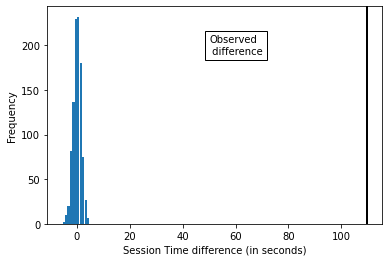

In [67]:
perm_diffs=[perm_fun(x,nA,nB) for _ in range(1000)] # Take the differences for R= 1000 times
#fig,ax=plt.subplots(figsize=(5,5))
fig,ax=plt.subplots()
ax.hist(perm_diffs,bins=11,rwidth=0.9)
ax.axvline(x=mean_b-mean_a,color='black',lw=2)
ax.text(50,190,'Observed\n difference',bbox={'facecolor':'White'})
ax.set_xlabel('Session Time difference (in seconds)')
ax.set_ylabel('Frequency')

In [ ]:
# Permutation program without replacement in  Python
# def permute(data_values,sample_sizeA,sample_sizeB):
#     total_size=sample_sizeA+sample_sizeB
#     import math
#     indexB=set(random.sample(range(total_size),sample_sizeB))
#     indexA=set(range(total_size))-indexB
#     return data_values.loc[indexB].mean()-data_values.loc[indexA].mean()

In [ ]:
# close_mean=AAPL_data_sliced['close'].mean()
# open_mean=AAPL_data_sliced['open'].mean()
# ax=AAPL_data.boxplot() # Not recommended but just for illustration purposes
# ax.set_xlabel("")
# ax.set_ylabel("Observation Date")

Statistical Testing

In [53]:
"""For example, let’s have a new test
where we declare H1 when k = 60 out of the 100 trials turns out to be heads. What
is the β function in this case?
Two case scenarios where """
import sympy as S
from sympy.stats import P, Binomial
theta=S.symbols('theta',real=True)
X=Binomial('x',100,theta) #sympy.stats.Binomial(name, n, p, succ=1, fail=0)
beta_function=P(X>60)
print("The beta with theta = 0.5 is:{}".format(beta_function.subs(theta,0.5)))
print("The beta with theta = 0.7 is:{}".format(beta_function.subs(theta,0.7)))

The beta with theta =0.5 is:0.0176001001088524
The beta with theta =0.7 is:0.979011423996075


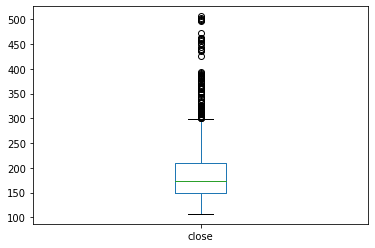

In [5]:
box_plot=AAPL_data['close'].plot.box()

<h3>Example: Web Stickiness</h3>



<h3>Exhaustive and Bootstrap Permutation Test</h3>
<h3>Permutation Tests</h3>
<h2>Statistical Significance and p-Values</h2>
<h3>p-Value</h3>
<h3>Alpha</h3>
<h3>Type 1 and Type 2 Errors</h3>
<h3>Data Science and p-Values</h3>
<h2>t-Tests</h2>
<h2>Multiple Testing</h2>
<h2>Degrees of Freedom</h2>
<h2>ANOVA</h2>
<h2>Chi-Square Test</h2>
<h3>Chi-Square Test: A Resampling Approach</h3>
<h3>Chi-Square Test: Statistical Theory</h3>
<h3>Fisher’s Exact Test</h3>
<h3>Relevance for Data science</h3>
<h2>Multi-Arm Bandit Algorithm</h2>
<h3>Multi-Arm Bandit Algorithm </h3>
<h2>Power and Sample Size</h2>
<h3>Sample Size </h3>